In [1]:
#Importing required packages.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn import datasets
from sklearn.feature_selection import SelectFromModel
%matplotlib inline

C:\Users\Patrick Munene\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
#from fast.ai
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [3]:
#Import train data
df = pd.read_csv(r'C:\Users\Patrick Munene\Documents\Machine Learning\Busara Mental Health Prediction Challenge\data\train.csv')
#Import test data
df_test = pd.read_csv(r'C:\Users\Patrick Munene\Documents\Machine Learning\Busara Mental Health Prediction Challenge\data\test.csv')

In [4]:
display_all(df.head())

,surveyid,village,survey_date,femaleres,age,married,children,hhsize,edu,hh_children,hh_totalmembers,cons_nondurable,asset_livestock,asset_durable,asset_phone,asset_savings,asset_land_owned_total,asset_niceroof,cons_allfood,cons_ownfood,cons_alcohol,cons_tobacco,cons_med_total,cons_med_children,cons_ed,cons_social,cons_other,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees,ent_nonag_revenue,ent_nonag_flowcost,ent_farmrevenue,ent_farmexpenses,ent_animalstockrev,ent_total_cost,fs_adskipm_often,fs_adwholed_often,fs_chskipm_often,fs_chwholed_often,fs_meat,fs_enoughtom,fs_sleephun,med_expenses_hh_ep,med_expenses_sp_ep,med_expenses_child_ep,med_portion_sickinjured,med_port_sick_child,med_afford_port,med_sickdays_hhave,med_healthconsult,med_vacc_newborns,med_child_check,med_u5_deaths,ed_expenses,ed_expenses_perkid,ed_schoolattend,ed_sch_missedpc,ed_work_act_pc,labor_primary,wage_expenditures,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
0,926,91,23-Nov-61,1,28.0,1,4,6,10,0,NaN,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,0,0.000000,0.000000,1,0.000000,0,0,5
1,747,57,24-Oct-61,1,23.0,1,3,5,8,0,NaN,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,1,4.804611,4.804611,0,0.000000,0,1,3
2,1190,115,05-Oct-61,1,22.0,1,3,5,9,0,NaN,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,0,8.007685,8.007685,1,0.000000,0,0,5
3,1065,97,23-Sep-61,1,27.0,1,2,4,10,2,4.0,378.83292,526.671080,196.98904,24.023054,49.647648,0.0,0,289.17352,36.434967,0.0,0.0,4.163996,0.960922,1.681614,39.771500,44.042267,0,1,0,1,0,32.030739,0.0,22.288055,1.875133,16.282293,17.890503,0.0,0.0,0.0,0.0,3.0,1.0,1.0,NaN,NaN,NaN,0.000000,0.00,NaN,0.000000,NaN,1,1,NaN,20.179367,10.089684,0.50,1.50,0.00,0,0,778.11230,69.219765,0,0.0,0,0.000000,0.000000,1,1.249199,0,0,0
4,806,42,12-Sep-61,0,59.0,0,4,6,10,4,6.0,258.67188,8.260629,173.52654,19.218445,0.000000,0.5,0,173.01099,0.870168,0.0,0.0,0.800768,0.800768,2.268844,8.087762,74.503502,1,0,0,0,0,0.000000,0.0,0.533846,2.073101,0.000000,2.073101,0.0,0.0,0.0,0.0,2.0,0.0,0.0,NaN,NaN,1.233183,0.333333,0.25,0.5,1.166667,1.0,1,1,NaN,27.226130,6.806532,0.75,1.75,1.25,1,0,201.00562,4.341945,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,3


## Feature Engineering

In [5]:
# sns.barplot(x="age", y="depressed", hue="femaleres", data=df);

C:\Users\Patrick Munene\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


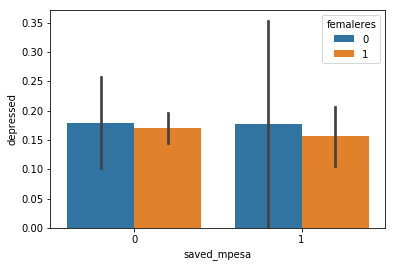

In [6]:
sns.barplot(x="saved_mpesa", y="depressed", hue="femaleres", data=df);

## Preprocessing Data for performing Machine learning algorithms

In [7]:
df.drop(['survey_date'], axis=1, inplace=True) 

In [8]:
df = df.fillna(df.mean())

In [9]:
#display_all(df.isnull().sum())

In [10]:
df['depressed'].value_counts()

0    950
1    193
Name: depressed, dtype: int64

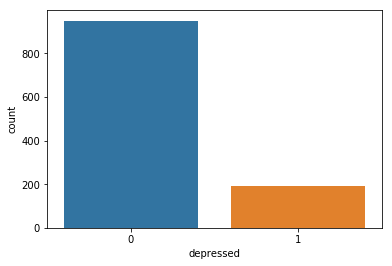

In [11]:
sns.countplot(df['depressed'])

In [12]:
display_all(df.head())

,surveyid,village,femaleres,age,married,children,hhsize,edu,hh_children,hh_totalmembers,cons_nondurable,asset_livestock,asset_durable,asset_phone,asset_savings,asset_land_owned_total,asset_niceroof,cons_allfood,cons_ownfood,cons_alcohol,cons_tobacco,cons_med_total,cons_med_children,cons_ed,cons_social,cons_other,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees,ent_nonag_revenue,ent_nonag_flowcost,ent_farmrevenue,ent_farmexpenses,ent_animalstockrev,ent_total_cost,fs_adskipm_often,fs_adwholed_often,fs_chskipm_often,fs_chwholed_often,fs_meat,fs_enoughtom,fs_sleephun,med_expenses_hh_ep,med_expenses_sp_ep,med_expenses_child_ep,med_portion_sickinjured,med_port_sick_child,med_afford_port,med_sickdays_hhave,med_healthconsult,med_vacc_newborns,med_child_check,med_u5_deaths,ed_expenses,ed_expenses_perkid,ed_schoolattend,ed_sch_missedpc,ed_work_act_pc,labor_primary,wage_expenditures,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
0,926,91,1,28.0,1,4,6,10,0,4.906057,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,1.829645,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.899587,0.440853,3.070457,0.274413,0.36712,5.626042,8.051863,3.722442,0.519817,0.49644,0.797353,1.955721,0.695412,1,1,0.510452,52.934778,18.611665,0.704684,1.355635,0.745047,0,0,0.00000,0.000000,0,0.0,0,0.000000,0.000000,1,0.000000,0,0,5
1,747,57,1,23.0,1,3,5,8,0,4.906057,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,1.829645,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.899587,0.440853,3.070457,0.274413,0.36712,5.626042,8.051863,3.722442,0.519817,0.49644,0.797353,1.955721,0.695412,1,1,0.510452,52.934778,18.611665,0.704684,1.355635,0.745047,0,0,0.00000,0.000000,0,0.0,1,4.804611,4.804611,0,0.000000,0,1,3
2,1190,115,1,22.0,1,3,5,9,0,4.906057,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,1.829645,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.899587,0.440853,3.070457,0.274413,0.36712,5.626042,8.051863,3.722442,0.519817,0.49644,0.797353,1.955721,0.695412,1,1,0.510452,52.934778,18.611665,0.704684,1.355635,0.745047,0,0,0.00000,0.000000,0,0.0,0,8.007685,8.007685,1,0.000000,0,0,5
3,1065,97,1,27.0,1,2,4,10,2,4.000000,378.83292,526.671080,196.98904,24.023054,49.647648,0.0,0,289.17352,36.434967,0.0,0.0,4.163996,0.960922,1.681614,39.771500,44.042267,0,1,0,1,0,32.030739,0.0,22.288055,1.875133,16.282293,17.890503,0.0,0.0,0.000000,0.000000,3.000000,1.000000,1.00000,5.626042,8.051863,3.722442,0.000000,0.00000,0.797353,0.000000,0.695412,1,1,0.510452,20.179367,10.089684,0.500000,1.500000,0.000000,0,0,778.11230,69.219765,0,0.0,0,0.000000,0.000000,1,1.249199,0,0,0
4,806,42,0,59.0,0,4,6,10,4,6.000000,258.67188,8.260629,173.52654,19.218445,0.000000,0.5,0,173.01099,0.870168,0.0,0.0,0.800768,0.800768,2.268844,8.087762,74.503502,1,0,0,0,0,0.000000,0.0,0.533846,2.073101,0.000000,2.073101,0.0,0.0,0.000000,0.000000,2.000000,0.000000,0.00000,5.626042,8.051863,1.233183,0.333333,0.25000,0.500000,1.166667,1.000000,1,1,0.510452,27.226130,6.806532,0.750000,1.750000,1.250000,1,0,201.00562,4.341945,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,3


### Splitting up the Training Data

In [13]:
#Now seperate the dataset as response variable and feature variabes
X = df.drop(['depressed', 'surveyid'], axis = 1)
y = df['depressed']

In [14]:
#Split the dataset into train and Test
seed = 23
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [15]:
# #Applying Standard scaling to get optimized result
sc = StandardScaler()

In [16]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [17]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (914, 72)
Training Labels Shape: (914,)
Testing Features Shape: (229, 72)
Testing Labels Shape: (229,)


## Training and testing data is ready now for fitting and tuning an algorithm

Now it's time to figure out which algorithm is going to deliver the best model. I'm going with the RandomForestClassifier, but you can drop any other classifier here, such as Support Vector Machines or Naive Bayes.

## Random Forest Classifier

In [18]:
#build model
rfc = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

In [19]:
# Train the classifier
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [20]:
# Apply The Full Featured Classifier To The Test Data
rfc_pred = rfc.predict(X_test)

In [21]:
#Let's see how our model performed
print(classification_report(y_test, rfc_pred))

             precision    recall  f1-score   support

          0       0.85      0.99      0.92       194
          1       0.50      0.03      0.05        35

avg / total       0.80      0.85      0.78       229



In [48]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,rfc_pred))

Accuracy for Random Forest on CV data:  0.8471615720524017


Random forest gives the accuracy of 85%

In [22]:
#Confusion matrix for the random forest classification
print(confusion_matrix(y_test, rfc_pred))

[[193   1]
 [ 34   1]]


## Let's try to increase our accuracy of models

### Grid Search with Cross Validation - Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

In [24]:
# Choose the type of classifier. 
rfc1 = RandomForestClassifier()

In [25]:
# Choose some parameter combinations to try
parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

In [26]:
# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

In [27]:
# Run the grid search
grid_obj = GridSearchCV(rfc1, parameters, scoring=acc_scorer, cv=10, n_jobs = -1, verbose = 2)

In [28]:
grid_obj = grid_obj.fit(X_train, y_train)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 717 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 1935 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 3633 tasks      | elapsed:   50.9s
[Parallel(n_jobs=-1)]: Done 5823 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed:  1.4min finished


In [29]:
# Set the clf to the best combination of parameters
grid_obj.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 4}

In [52]:
rfc2 = RandomForestClassifier(random_state=42, max_depth = 5, max_features='log2',
                              min_samples_leaf = 5, min_samples_split = 5,
                              n_estimators= 4, criterion='entropy')

In [53]:
# Fit the best algorithm to the data. 
rfc2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=4, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [54]:
pred_rfc2 = rfc2.predict(X_test)

print(classification_report(y_test, pred_rfc2))

             precision    recall  f1-score   support

          0       0.85      1.00      0.92       194
          1       0.00      0.00      0.00        35

avg / total       0.72      0.85      0.78       229



C:\Users\Patrick Munene\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [55]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred_rfc2))

Accuracy for Random Forest on CV data:  0.8471615720524017


RF improves from 84% to 85% using Grid Search CV

### Validate with KFold

Is this model actually any good? It helps to verify the effectiveness of the algorithm using KFold. This will split our data into 10 buckets, then run the algorithm using a different bucket as the test set for each iteration.

In [56]:
from sklearn.cross_validation import KFold

def run_kfold(rfc2):
    kf = KFold(891, n_folds=10)
    outcomes = []
    fold = 0
    for train_index, test_index in kf:
        fold += 1
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        rfc2.fit(X_train, y_train)
        predictions = rfc2.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))     
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome)) 

run_kfold(rfc2)

Fold 1 accuracy: 0.7333333333333333
Fold 2 accuracy: 0.8089887640449438
Fold 3 accuracy: 0.8876404494382022
Fold 4 accuracy: 0.8426966292134831
Fold 5 accuracy: 0.797752808988764
Fold 6 accuracy: 0.8426966292134831
Fold 7 accuracy: 0.8426966292134831
Fold 8 accuracy: 0.7865168539325843
Fold 9 accuracy: 0.8651685393258427
Fold 10 accuracy: 0.7865168539325843
Mean Accuracy: 0.8194007490636703


## Predict the Actual Test Data

And now for the moment of truth. Make the predictions, export the CSV file, and upload them to Zindi.

In [57]:
#Import test data
df_test = pd.read_csv(r'C:\Users\Patrick Munene\Documents\Machine Learning\Busara Mental Health Prediction Challenge\data\test.csv')

In [58]:
# Repeat data manipulation in train data
df_test.drop(['survey_date','depressed'], axis=1, inplace=True)

In [59]:
df_test = df_test.fillna(df_test.mean())

In [60]:
display_all(df_test.head())

,surveyid,village,femaleres,age,married,children,hhsize,edu,hh_children,hh_totalmembers,cons_nondurable,asset_livestock,asset_durable,asset_phone,asset_savings,asset_land_owned_total,asset_niceroof,cons_allfood,cons_ownfood,cons_alcohol,cons_tobacco,cons_med_total,cons_med_children,cons_ed,cons_social,cons_other,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees,ent_nonag_revenue,ent_nonag_flowcost,ent_farmrevenue,ent_farmexpenses,ent_animalstockrev,ent_total_cost,fs_adskipm_often,fs_adwholed_often,fs_chskipm_often,fs_chwholed_often,fs_meat,fs_enoughtom,fs_sleephun,med_expenses_hh_ep,med_expenses_sp_ep,med_expenses_child_ep,med_portion_sickinjured,med_port_sick_child,med_afford_port,med_sickdays_hhave,med_healthconsult,med_vacc_newborns,med_child_check,med_u5_deaths,ed_expenses,ed_expenses_perkid,ed_schoolattend,ed_sch_missedpc,ed_work_act_pc,labor_primary,wage_expenditures,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,day_of_week
0,901,181,1,21.0,0,3,4,10,3,4.0,357.817690,355.244350,208.199810,40.038425,0.000000,2.00,0,230.975950,4.484304,0.00000,0.0,0.0,0.0000,0.000000,4.003842,122.837890,0,1,0,1,0,72.069168,24.023054,3.042920,6.526263,0.000000,48.166225,7.5,0.0,1.000000,0.0,3.0,0.0,1.0,12.011527,6.878325,12.278451,1.000000,1.000000,1.000000,1.000000,1.000000,1,1,0.506944,0.000000,0.000000,0.000000,0.000000,0.775476,0,0,569.850340,48.166222,0,0.0,0,0.0,0.0,1,0.000000,0,3
1,498,47,1,44.0,1,6,8,6,6,8.0,233.441540,240.958880,11.691220,0.000000,12.812296,3.00,0,211.948930,7.420455,1.08492,0.0,0.0,0.0000,1.521460,0.000000,19.971167,0,1,0,0,0,0.000000,0.000000,1.654922,0.378141,8.034377,0.378141,3.0,0.0,0.000000,0.0,5.0,0.0,0.0,5.555798,6.878325,1.089045,0.750000,0.666667,0.666667,2.750000,0.333333,1,1,0.506944,18.257523,3.651504,0.800000,3.000000,1.600000,0,0,252.650100,14.711897,0,0.0,0,0.0,0.0,0,0.000000,0,2
2,710,8,1,23.0,1,1,3,7,1,3.0,171.970760,0.000000,120.916050,56.053795,0.000000,0.00,0,81.644066,0.000000,0.00000,0.0,0.0,0.0000,0.720692,13.452910,76.153084,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.0,0.0,0.000000,0.0,2.0,0.0,1.0,13.079219,32.030739,4.804611,1.000000,1.000000,1.000000,2.666667,1.000000,1,1,0.506944,8.648300,8.648300,1.000000,1.000000,0.775476,1,0,141.736020,0.720692,0,0.0,0,0.0,0.0,1,0.080077,0,1
3,433,25,1,67.0,0,0,1,1,0,1.0,37.013428,20.651573,32.831509,0.000000,0.000000,1.75,0,25.749285,0.160154,0.00000,0.0,0.0,1.0228,0.000000,2.535767,8.728376,1,0,0,0,0,0.000000,0.000000,0.000000,4.804611,0.533846,4.804611,20.0,3.0,3.491525,0.5,1.0,0.0,1.0,1.121076,6.878325,3.158983,1.000000,0.478367,1.000000,3.000000,0.000000,1,1,0.506944,45.796372,15.852179,0.696575,1.263021,0.775476,1,0,58.287693,4.804611,0,0.0,0,0.0,0.0,0,0.000000,1,3
4,44,2,1,40.0,1,4,6,7,4,6.0,156.061390,236.828550,158.552170,19.218445,0.080077,2.00,0,148.180500,8.608261,0.00000,0.0,0.0,0.0000,2.275517,0.000000,5.605380,1,0,0,0,0,0.000000,0.000000,1.401345,0.116779,13.012488,8.124464,1.0,0.0,20.000000,0.0,7.0,0.0,1.0,5.555798,6.878325,0.800768,0.166667,0.250000,1.000000,0.500000,1.000000,1,1,0.506944,27.306206,6.826551,1.000000,1.250000,0.750000,1,0,440.223750,10.480058,0,0.0,0,0.0,0.0,0,0.000000,1,4


In [61]:
df_test.shape

(286, 73)

In [40]:
# df_test = sc.fit_transform(df_test)

And finally let's create a csv file with predictions.

In [62]:
ids = df_test['surveyid']
predictions = rfc2.predict(df_test.drop('surveyid', axis=1))
output = pd.DataFrame({ 'surveyid' : ids, 'depressed': predictions })

In [63]:
# output.to_csv('submission.csv', index = False)
output.head()

,surveyid,depressed
0,901,0
1,498,0
2,710,0
3,433,0
4,44,0


In [64]:
#save to csv file
output.to_csv(r'C:\Users\Patrick Munene\Documents\Machine Learning\Busara Mental Health Prediction Challenge\data\submission.csv', index=False)